In [0]:

import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor

In [0]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score

In [0]:
cd ..

/


SyntaxError: ignored

In [4]:
cd "/content/drive/My Drive/Colab Notebooks/so_matrix/so_matrix/data"

/content/drive/My Drive/Colab Notebooks/so_matrix/so_matrix/data


In [5]:
ls

shoes_prices.csv


In [0]:
df =pd.read_csv('shoes_prices.csv',low_memory=False)


In [7]:
df.columns

Index(['id', 'asins', 'brand', 'categories', 'colors', 'count', 'dateadded',
       'dateupdated', 'descriptions', 'dimension', 'ean', 'features',
       'flavors', 'imageurls', 'isbn', 'keys', 'manufacturer',
       'manufacturernumber', 'merchants', 'name', 'prices_amountmin',
       'prices_amountmax', 'prices_availability', 'prices_color',
       'prices_condition', 'prices_count', 'prices_currency',
       'prices_dateadded', 'prices_dateseen', 'prices_flavor', 'prices_issale',
       'prices_merchant', 'prices_offer', 'prices_returnpolicy',
       'prices_shipping', 'prices_size', 'prices_source', 'prices_sourceurls',
       'prices_warranty', 'quantities', 'reviews', 'sizes', 'skus',
       'sourceurls', 'upc', 'vin', 'websiteids', 'weight'],
      dtype='object')

In [8]:
pd.__version__


'0.25.3'

In [0]:
df['prices_amountmin'] = pd.to_numeric(df['prices_amountmin'], errors='coerce')
df['prices_amountmin'].dropna(inplace=True)



In [0]:
mean_price = np.mean(df['prices_amountmin'])

In [12]:
mean_price


111.95223800144517

In [0]:
y_true = df['prices_amountmin']

In [0]:
y_pred = [mean_price] * y_true.shape[0]

In [15]:
mean_absolute_error(y_true,y_pred)

88.9487551815721

In [0]:
t=mean_absolute_error([1,1],[0,11])

In [0]:
t

5.5

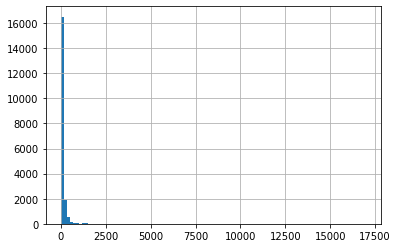

In [17]:
df['prices_amountmin'].hist(bins=100)

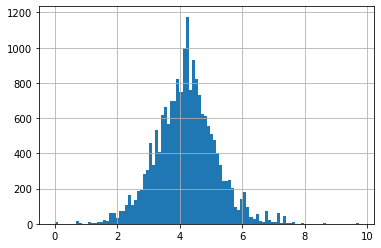

In [18]:
np.log1p(df['prices_amountmin']).hist(bins=100)

In [19]:
y_pred=[np.median(y_true)] * y_true.shape[0]
mean_absolute_error(y_true,y_pred)

76.10938322794651

In [0]:
price_log_mean  =np.expm1(np.mean(np.log1p(y_true)))

In [23]:
y_true = df['prices_amountmin']
y_pred = [price_log_mean] * y_true.shape[0]
mean_absolute_error(y_true,y_pred)

76.11865171284919

In [0]:
 df.categories

0               Clothing,Shoes,Men's Shoes,All Men's Shoes
1               Clothing,Shoes,Men's Shoes,All Men's Shoes
2               All Men's Shoes,Shoes,Men's Shoes,Clothing
3               All Men's Shoes,Shoes,Men's Shoes,Clothing
4               All Men's Shoes,Shoes,Men's Shoes,Clothing
                               ...                        
19382      Clothing, Shoes & Accessories,Men's Shoes,Boots
19383           Clothing,Shoes,Men's Shoes,All Men's Shoes
19384    Women's Sunglasses,Sunglasses,Bags & Accessori...
19385    Women's Sunglasses,Sunglasses,Bags & Accessori...
19386    Women's Sunglasses,Sunglasses,Bags & Accessori...
Name: categories, Length: 19387, dtype: object

In [0]:
df.abs

<bound method NDFrame.abs of                          id asins                brand  ...  vin websiteids  weight
0      AVpfHrJ6ilAPnD_xVXOI   NaN                Josmo  ...  NaN        NaN     NaN
1      AVpfHrJ6ilAPnD_xVXOI   NaN                Josmo  ...  NaN        NaN     NaN
2      AVpfHsWP1cnluZ0-eVZ7   NaN  SERVUS BY HONEYWELL  ...  NaN        NaN     NaN
3      AVpfHsWP1cnluZ0-eVZ7   NaN  SERVUS BY HONEYWELL  ...  NaN        NaN     NaN
4      AVpfHsWP1cnluZ0-eVZ7   NaN  SERVUS BY HONEYWELL  ...  NaN        NaN     NaN
...                     ...   ...                  ...  ...  ...        ...     ...
19382  AVpfdSjlilAPnD_xcGPm   NaN           Xray, XRay  ...  NaN        NaN     NaN
19383  AVpf3bFWilAPnD_xjrQ2   NaN                 Fila  ...  NaN        NaN     NaN
19384  AVpf0fJXLJeJML43EVe9   NaN          Seek Optics  ...  NaN        NaN     NaN
19385  AVpf0fJXLJeJML43EVe9   NaN          Seek Optics  ...  NaN        NaN     NaN
19386  AVpf0fJXLJeJML43EVe9   NaN          Seek

In [24]:
df['brand'].value_counts()

Nike             1710
Ralph Lauren      697
PUMA              574
New Balance       361
VANS              356
                 ... 
OneTigris           1
Unbrand             1
VUARNET             1
Wood N Stream       1
J'colour            1
Name: brand, Length: 1960, dtype: int64

In [25]:
df.brand.value_counts()

Nike             1710
Ralph Lauren      697
PUMA              574
New Balance       361
VANS              356
                 ... 
OneTigris           1
Unbrand             1
VUARNET             1
Wood N Stream       1
J'colour            1
Name: brand, Length: 1960, dtype: int64

In [26]:
df.brand.factorize()[0]

array([  0,   0,   1, ..., 441, 441, 441])

In [0]:
df['brand_cat'] = df.brand.factorize()[0]

In [0]:
ii = np.isfinite(y)

In [0]:
y = y[~np.isnan(y)]


In [0]:
y.shape

(19294,)

In [0]:
x

array([[  0],
       [  0],
       [  1],
       ...,
       [441],
       [441],
       [441]])

In [36]:
feats = ['brand_cat']
x=df[feats].values
x
y=df.prices_amountmin.values
y
model = DecisionTreeRegressor(max_depth=5)
cross_val_score(model,x,y,scoring='neg_mean_absolute_error')


array([39.89, 51.99, 40.02, ..., 32.48, 31.48, 72.  ])